# Chapter 10 - Simple Linear Regression

## by Jacob Kuhn

#### A Simple Linear Regression Model attempts to find the correlation between two sets of data points to produce a prediction line for further data points.

In [375]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [377]:
data = sns.load_dataset('diamonds') 

In [379]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value) ##
- strengh of correlation between data points
- spans from -1 to 1.
- -1 being a direct 1:-1 inverse correlation.
- 1 being a direct 1:1 correlation
- 0 represents a lack of correlation
- any number in between describes how concentrated to the prediction the data is.
- The square of the r-value gives the coefficient of determination which states the proportion of vaiations in y that can be explained by variations in x
- r = concentration, r^2 = the percent proportion explained
- exponentially related.

In [383]:
data.corr()

ValueError: could not convert string to float: 'Ideal'

In [385]:
data['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [387]:
data_num = data.copy()

In [389]:
data_num.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [391]:
# This is set as 5 being best, and 1 being worst to maintain positive correlations to price.
data_num['cut'] = data_num['cut'].replace({'Ideal': '5', 'Premium': '4', 'Very Good': '3', 'Good': '2', 'Fair': '1'})

C:\Users\TempK\AppData\Local\Temp\ipykernel_22000\3615342551.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_num['cut'] = data_num['cut'].replace({'Ideal': '5', 'Premium': '4', 'Very Good': '3', 'Good': '2', 'Fair': '1'})


In [393]:
data_num.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [395]:
#*notices color as well* *and clarity*
data_num['color'].unique()


['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

Quick personal comment - this assignment is flowing MUCH (exponentially) smoother with being a topic of interest to where I am naturally drawn to develop the data further, experiment, and go beyond bear minimum... Thank you - the fires one wasn't too bad either. I would bet most people taking this course will be going into finances/business or observable sciences. ;)

In [398]:
data_num['color'] = data_num['color'].replace({'J' : '1', 'I' : '2', 'H' : '3', 'G' : '4', 'F': '5', 'E': '6', 'D' : '7'})

C:\Users\TempK\AppData\Local\Temp\ipykernel_22000\919156502.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_num['color'] = data_num['color'].replace({'J' : '1', 'I' : '2', 'H' : '3', 'G' : '4', 'F': '5', 'E': '6', 'D' : '7'})


In [400]:
data_num['clarity'].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [402]:
data_num['clarity'] = data_num['clarity'].replace({'I1' : '1', 'SI2' : '2', 'SI1' : '3', 'VS2' : '4', 'VS1' : '5', 'VVS2' : '6', 'VVS1' : '7', 'IF' : '8'})

C:\Users\TempK\AppData\Local\Temp\ipykernel_22000\2099979538.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_num['clarity'] = data_num['clarity'].replace({'I1' : '1', 'SI2' : '2', 'SI1' : '3', 'VS2' : '4', 'VS1' : '5', 'VVS2' : '6', 'VVS1' : '7', 'IF' : '8'})


In [404]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [406]:
data_num.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [408]:
data_num.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


I know directions say first seven rows but I went on a limb here wanting to see the correlations with the cut, color, and clarity. I tried inversing the numerical assignment for cut and same values stand which are very fascinating... I'd be curious to see where this data comes from.

<Axes: >

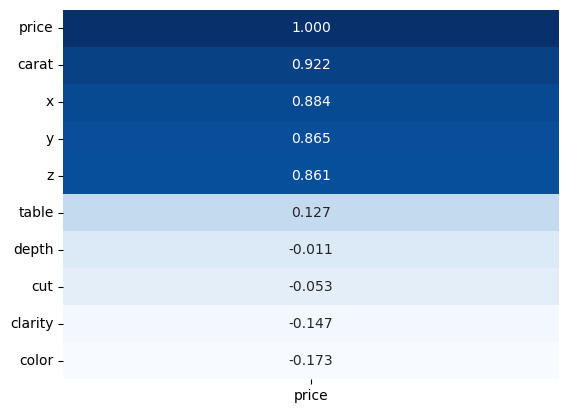

In [411]:
sns.heatmap(data=data_num.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Blues', cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model ##

1. Split the data between training and testing
2. Create model from training data
3. Validate the model with the test data and evaluate accuracy
4. Adjust if needed and deploy onto desired data for prediction

In [414]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [416]:
x_train, x_test, y_train, y_test = train_test_split(
    data_num[['carat']], data_num[['price']], 
    test_size=0.30, random_state=20)

Model = LinearRegression()
Model.fit(x_train, y_train)

Model.score(x_test, y_test)

0.8504107786474794

In [418]:
y_predicted = Model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [420]:
p_data = pd.DataFrame(y_predicted, columns=['predicted_price'])

p_data.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [422]:
comb_data = p_data.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])

In [424]:
comb_data.head()

,predicted_price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [426]:
melt_data = pd.melt(comb_data, id_vars=['carat'], 
                 value_vars=['price','predicted_price'], 
                 var_name='price_type', value_name='price_value')
melt_data

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


C:\Users\TempK\AppData\Local\Temp\ipykernel_22000\3111412975.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melt_data, x='carat', y='price_value',ci = None, hue='price_type')


<Axes: xlabel='carat', ylabel='price_value'>

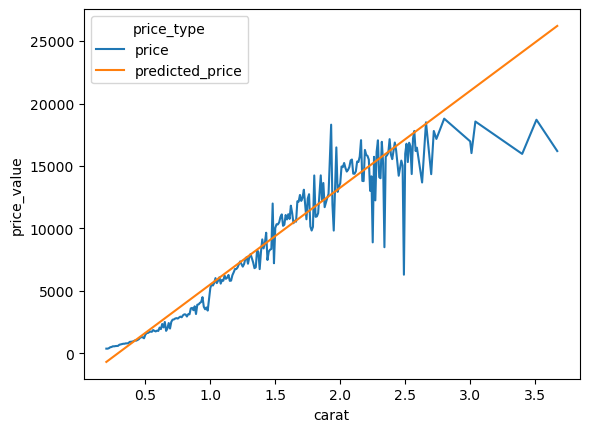

In [428]:
sns.lineplot(data=melt_data, x='carat', y='price_value',ci = None, hue='price_type')

## Regression line equation is **y = mx + b**, where... ###
- y is the **dependent** variable
- m is the **slope** of the line
- x is the **independent** variable
- b is the **Y-intercept**

In [431]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [433]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [437]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800452183


In [439]:
print(f'Regression line equation is y={m}x + {b}')

Regression line equation is y=[7756.42561797]x + -2256.3605800452183


In [467]:

def main():
    x = float(input('Hello, please enter carat size'))
    Y = m*x + b
    print(f'The predicted price for a {x} carat diamond is ${Y}')

main()

Hello, please enter carat size .70


The predicted price for a 0.7 carat diamond is $[3173.13735253]


In [470]:
def main():
    x = float(input('Hello, please enter carat size'))
    Y = m*x + b
    print(f'The predicted price for a {x} carat diamond is ${Y}')

main()

Hello, please enter carat size .54


The predicted price for a 0.54 carat diamond is $[1932.10925366]


Yes I'd say they're close enough - is the small difference arising from the sigfigs used in the **.reshape** function?

_______________________


Personal Experimentation:

In [710]:
ref_data = data_num.query('carat < 1.15 and carat > .85')

In [712]:
ref_data

,carat,cut,color,clarity,depth,table,price,x,y,z
91,0.86,1,6,2,55.1,69.0,2757,6.45,6.33,3.52
97,0.96,1,5,2,66.3,62.0,2759,6.27,5.95,4.07
112,0.90,4,2,4,63.0,58.0,2761,6.16,6.12,3.87
126,0.91,4,3,3,61.4,56.0,2763,6.09,5.97,3.70
128,0.91,1,3,2,64.4,57.0,2763,6.11,6.09,3.93
...,...,...,...,...,...,...,...,...,...,...
53875,1.04,3,2,1,61.6,61.0,2745,6.45,6.47,3.98
53879,1.04,1,4,2,65.2,57.0,2745,6.25,6.23,4.07
53897,1.02,2,3,1,64.3,63.0,2751,6.28,6.23,4.02
53917,0.90,3,1,3,63.2,60.0,2753,6.12,6.09,3.86


<Axes: >

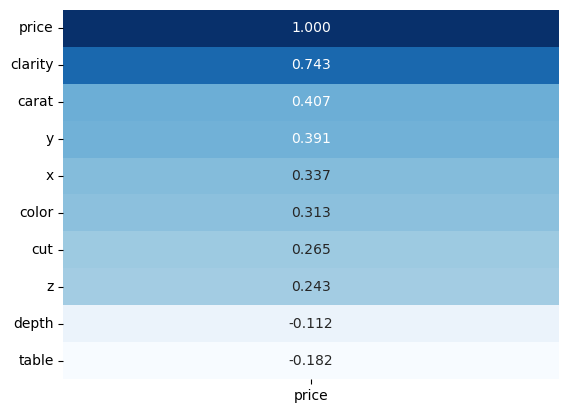

In [714]:
sns.heatmap(data=ref_data.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Blues', cbar=False, fmt=f'.3f')

In [716]:
ref_data_2 = ref_data.query('carat < 1.05 and carat > .95')

<Axes: >

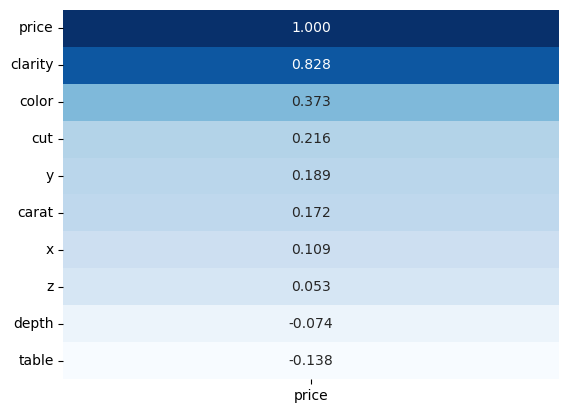

In [718]:
sns.heatmap(data=ref_data_2.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Blues', cbar=False, fmt=f'.3f')

In [720]:
ref_data_3 = ref_data_2.query('clarity == "1" and carat < 1.05 and carat > .95')

<Axes: >

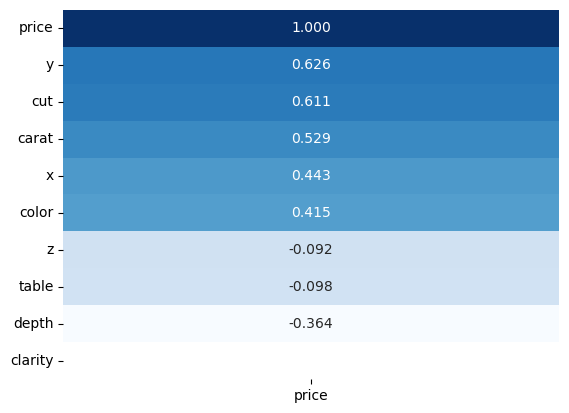

In [722]:
sns.heatmap(data=ref_data_3.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Blues', cbar=False, fmt=f'.3f')

<Axes: >

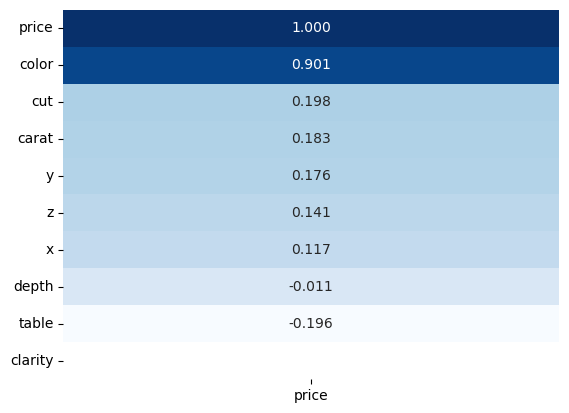

In [724]:
ref_data_3 = ref_data_2.query('clarity == "7" and carat < 1.05 and carat > .95')

sns.heatmap(data=ref_data_3.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Blues', cbar=False, fmt=f'.3f')